In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("Done.")

Done.


In [16]:
# read the csv file
df = pd.read_csv(r'.\prop_for_sale\prop_for_sale_20250315_m.csv', sep=",", encoding="utf-8")
df.head(2)


,Unnamed: 0,time,refnum,nri,price,type,details,company,contact_number,request,old_price,actual_price,location,type2,property_type,bedroom,company_link,contact_number_cleaned
0,0,2025-03-15 13:25:37.952669,1,0,430000,3 Bedroom Semi-Detached House For Sale in Qormi,Semi-detached house of character in a sought-a...,sensara-malta,tel:+356 9998 6779,https://www.propertymarket.com.mt/view/3-bedro...,430000,430000,Qormi,3 Bedroom Semi-Detached House,Semi-Detached House,3,https://www.propertymarket.com.mt/company/sens...,99986779
1,1,2025-03-15 13:25:38.667311,1,1,400000,2 Bedroom Apartment For Sale in Swieqi,SWIEQI: A 3rd floor very bright and FULLY FURN...,phoenix,tel:99821251,https://www.propertymarket.com.mt/view/2-bedro...,400000,400000,Swieqi,2 Bedroom Apartment,Apartment,2,https://www.propertymarket.com.mt/company/phoenix,99821251


In [17]:

df = df.drop(columns=['Unnamed: 0', 'time', 'refnum', 'nri', 'price', 'type', 'details',
                     'contact_number', 'request', 'old_price',
                     'type2', 'company_link', 'contact_number_cleaned'])

df = df[(df['actual_price'] != 0) & (df['bedroom'] != 0)]

df.columns = ["property_seller", "property_price", "property_location", "property_type", "property_rooms"]

print("Initial DataFrame:")
print(df.head())
print("\nColumn Names:", df.columns.tolist())


Initial DataFrame:
   property_seller  property_price property_location        property_type  \
0    sensara-malta          430000             Qormi  Semi-Detached House   
1          phoenix          400000            Swieqi            Apartment   
2  316-real-estate          318000            Zabbar            Penthouse   
3   property-giant          425000             Gzira           Maisonette   
4         alliance          310000             Qawra            Apartment   

   property_rooms  
0               3  
1               2  
2               2  
3               3  
4               3  

Column Names: ['property_seller', 'property_price', 'property_location', 'property_type', 'property_rooms']


In [18]:
# --- Data Preprocessing ---

# Handle categorical features using Label Encoding (for simplicity in this example)
# For a more robust solution, One-Hot Encoding would be preferred.
label_encoders = {}
for column in ['property_seller', 'property_location', 'property_type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("\nDataFrame after Label Encoding:")
print(df.head())



DataFrame after Label Encoding:
   property_seller  property_price  property_location  property_type  \
0               40          430000                 76             27   
1               23          400000                 93              1   
2                0          318000                106             24   
3               26          425000                 43             20   
4                1          310000                 75              1   

   property_rooms  
0               3  
1               2  
2               2  
3               3  
4               3  


In [29]:
df[["property_seller"]]

,property_seller
0,40
1,23
2,0
3,26
4,1
...,...
39403,14
39404,14
39406,14
39407,14


In [19]:
# Define features (X) and target (y)
X = df.drop('property_price', axis=1)
y = df['property_price']


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Scale numerical features (optional but often beneficial for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Convert scaled data back to DataFrame for easier handling (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nScaled Training Data:")
print(X_train_scaled_df.head())



Scaled Training Data:
   property_seller  property_location  property_type  property_rooms
0         0.339456           0.357201      -0.951344       -0.286466
1         1.195640           0.888327       0.955781       -0.286466
2        -0.445378           1.450696       1.702047        0.115709
3        -0.231333           0.919570      -0.951344        0.115709
4         1.266988          -0.080197      -0.951344        0.115709


In [23]:
# --- Model Training ---

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df, y_train)
linear_predictions = linear_model.predict(X_test_scaled_df)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train) # Random Forest can often handle unscaled data well
rf_predictions = rf_model.predict(X_test)


In [24]:
# --- Model Evaluation ---

# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error: {linear_mse:.2f}")
print(f"R-squared: {linear_r2:.2f}")



Linear Regression Evaluation:
Mean Squared Error: 516170490884.78
R-squared: 0.10


In [25]:
# Evaluate Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("\nRandom Forest Regression Evaluation:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")


Random Forest Regression Evaluation:
Mean Squared Error: 276386168551.26
R-squared: 0.52


In [ ]:
The high Mean Squared Error (MSE) in both cases (Linear Regression and Random Forest Regression) could be due to several reasons:

1. **Feature Scaling Issues**:
    - While scaling was applied to the features for Linear Regression, it might not have been sufficient to improve the model's performance. Random Forest, on the other hand, does not require scaling, but the features might still not be informative enough.

2. **Feature Selection**:
    - The features used (`property_seller`, `property_location`, `property_type`, `property_rooms`) might not be sufficient to explain the variability in the target variable (`property_price`). Important features like `property_area`, `property_age`, or other relevant attributes might be missing.

3. **Outliers**:
    - The dataset might contain outliers in the `property_price` column, which can significantly increase the MSE. For example, properties with extremely high or low prices compared to the rest of the dataset can skew the results.

4. **Non-linearity**:
    - Linear Regression assumes a linear relationship between features and the target variable. If the relationship is non-linear, Linear Regression will perform poorly. Random Forest can handle non-linear relationships better, but it might still struggle if the data is noisy or lacks sufficient features.

5. **Data Quality**:
    - The dataset might have issues such as missing values, incorrect data, or imbalanced data (e.g., too many properties in one price range and very few in others).

6. **Overfitting or Underfitting**:
    - Random Forest might be overfitting the training data if the number of trees or depth is too high. Conversely, Linear Regression might be underfitting if the model is too simple to capture the complexity of the data.

### Suggestions to Improve the Model:
1. **Feature Engineering**:
    - Add more relevant features that could impact property prices, such as `property_area`, `property_age`, or proximity to amenities.

2. **Outlier Detection**:
    - Identify and handle outliers in the `property_price` column.

3. **Data Transformation**:
    - Apply transformations (e.g., log transformation) to the target variable if it has a skewed distribution.

4. **Model Tuning**:
    - For Random Forest, tune hyperparameters like the number of trees, maximum depth, and minimum samples per leaf.

5. **Try Other Models**:
    - Experiment with other models like Gradient Boosting, XGBoost, or Neural Networks, which might perform better on this type of data.

6. **Cross-Validation**:
    - Use cross-validation to ensure the model generalizes well to unseen data.

By addressing these issues, you can potentially reduce the MSE and improve the model's performance.

In [31]:
# Example input data (new property details)
new_data = pd.DataFrame({
    'property_seller': [10],
    'property_location': [57],
    'property_type': [24],
    'property_rooms': [4]
})

# Scale the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Ensure the input data has the same feature names as the training data
new_data_scaled = pd.DataFrame(new_data_scaled, columns=X_train.columns)

# Predict using Linear Regression
linear_prediction = linear_model.predict(new_data_scaled)
print(f"Linear Regression Prediction: {linear_prediction[0]:.2f}")

# Predict using Random Forest (no scaling needed)
rf_prediction = rf_model.predict(new_data)
print(f"Random Forest Prediction: {rf_prediction[0]:.2f}")

Linear Regression Prediction: 828141.33
Random Forest Prediction: 1081775.00


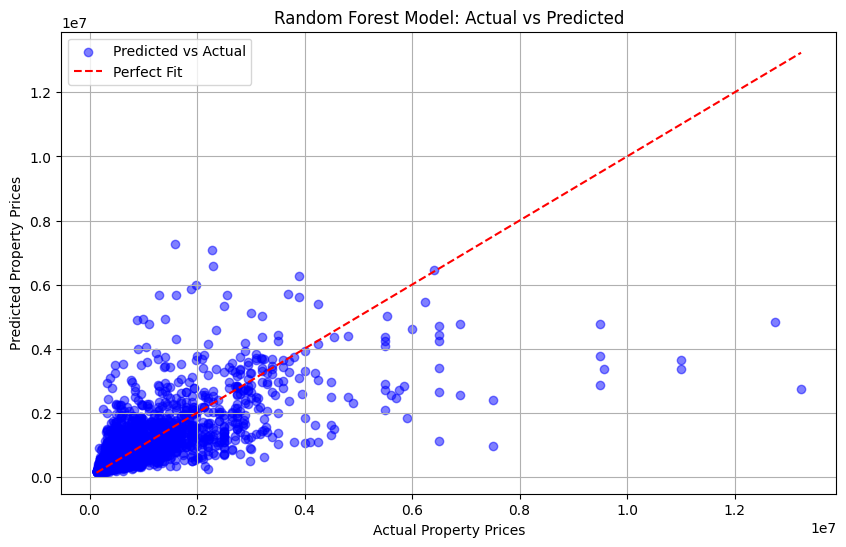

In [32]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, label="Predicted vs Actual", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")

plt.title("Random Forest Model: Actual vs Predicted")
plt.xlabel("Actual Property Prices")
plt.ylabel("Predicted Property Prices")
plt.legend()
plt.grid(True)
plt.show()